In [1]:
import mfpy
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib.lines import Line2D
%matplotlib widget

### Fx pure

[ 1.50493608e+00  1.00147855e+00 -8.08150650e-02  9.55748783e-02
  2.58913682e-01  3.07943900e-02 -5.28677725e-02  1.97332472e+01
  1.25070945e+01 -3.30517746e-01 -2.29631310e-05  1.24024335e-03
 -1.81662570e-04 -3.91880057e-04]


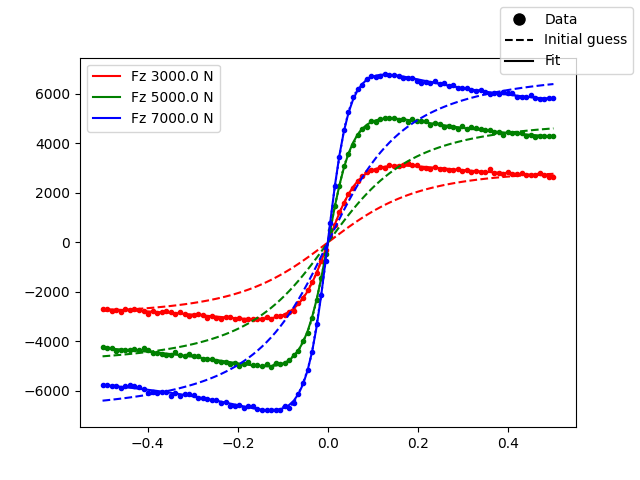

In [2]:
Fx_pure_folder = r'samples\fit\Fx_pure'#Folder that contains the .csv files in the good. For more details check the MFPy_/fit.py or read the readme.md



'''Calling the fit function for the Fx_Pure. The user can chose if he wants to inputs his own initial guess for the fitting process, the nominal force and 
the desired output. For initial_guess = None, the function will use a pre-built initial guess. For Fz_nom = None, the function will use the median of the
Fz forces in the .csv file.
For the output types, with full_output is None, the output will be only the fittted coefficients (p_fit) and the Fx_fitted. For a complete output, the user can
can use the full_output = 2.
'''

p_fit_Fx0,initial_guess,Fz_nom,Fz_data,Fx_data,kappa_data,Fx_initial,Fx_fit = mfpy.Fit.Fx_pure(Fx_pure_folder,initial_guess = None,Fz_nom=None,full_output=2)


#Plot settings
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fz_data)):
    color = colors[i % len(colors)] 
    ax.plot(kappa_data[i],Fx_initial[i],'--',color=color)
    ax.plot(kappa_data[i],Fx_data[i],':',marker=".",color=color)
    ax.plot(kappa_data[i],Fx_fit[i],'-',color=color,label='Fz {} N'.format(Fz_data[i]))
ax.legend()
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')
print(p_fit_Fx0)

### Fy pure cornering

[ 1.49987414e+00  8.99839892e-01 -5.86398227e-02 -6.44835347e-02
 -8.32272214e-01 -5.27549798e-01  9.29282383e-02 -6.86437632e+00
 -3.23495249e+00 -1.51454488e+01  1.51450825e+00 -1.41389740e-01
  1.78342605e+00  2.39228218e+00 -8.93523709e-01 -1.93816427e-01
 -2.04263903e-03  3.10880040e-03 -6.52945290e-03  4.20541876e-02
 -2.01744457e-01 -4.90542491e-01]


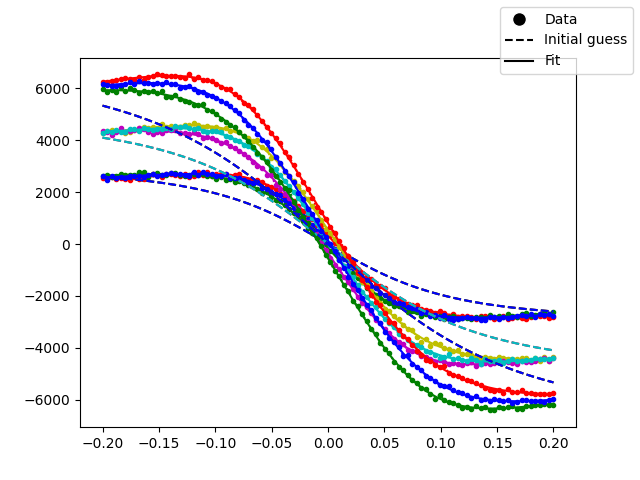

In [3]:
Fy_pure_folder = r'samples\fit\Fy_pure'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md

p_fit_Fy0,initial_guess,Fz_nom,Fz_data_output,Fy_data_output,alpha_data,gamma_data,Fy_initial_output,Fy_fit_output = mfpy.Fit.Fy_pure(Fy_pure_folder,initial_guess=None,Fz_nom=None,full_output=2)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fy_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Fy_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],Fy_data_output[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Fy_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')   
print(p_fit_Fy0)

### Mz pure cornering

[ 1.16873959e+01  1.17663252e-01  2.13134755e-01 -9.19761070e+00
  7.03287582e-01 -1.00000000e-01  3.35040635e-02  1.30331344e+00
  8.83777027e-02 -1.23133549e-03  9.02757197e-01 -4.08691302e+00
  2.30059116e-03 -2.38119723e-03 -1.94639157e-02  3.71853323e-01
 -1.32579077e+00 -3.65904147e+00 -1.96639652e+00  1.77267832e+00
 -4.26758923e-01  3.11598458e-01 -5.92506448e-01  2.23999228e-03
  8.17202283e-04  2.49313348e-01 -2.05099599e-01]


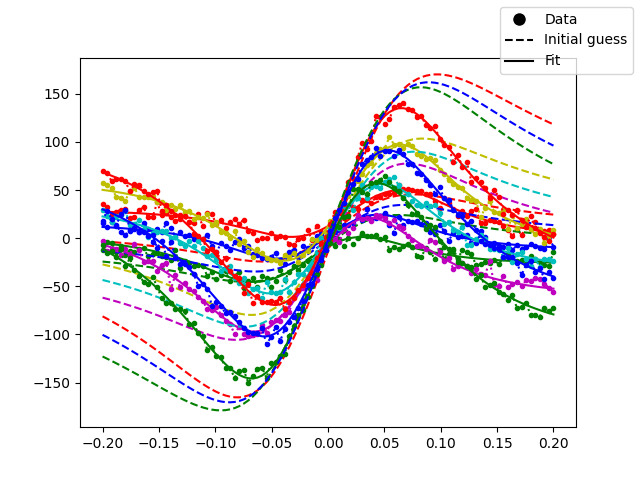

In [4]:
#Fitting Mz pure

Mz_pure_folder = r'samples\fit\Mz_pure'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
R0 = 0.3135 #Unloaded radius in m (necessary parameter)
Vx = 17
p_fit_Mz0,initial_guess,Fz_nom,Fz_data,Mz_data,alpha_data,gamma_data,Mz_initial,Mz_fit = mfpy.Fit.Mz_pure(Mz_pure_folder,R0,Vx,p_fit_Fy0,Fz_nom=None,full_output=2) 
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Mz_data)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Mz_initial[i],'--',color=color)
    ax.plot(alpha_data[i],Mz_data[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Mz_fit[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right') 
print(p_fit_Mz0)

#### Fx combined

[ 1.25170283e+01  9.80145791e+00  1.21794180e-05  9.97142720e-01
 -4.92881383e-01 -5.09428029e-01  1.80883664e-03]


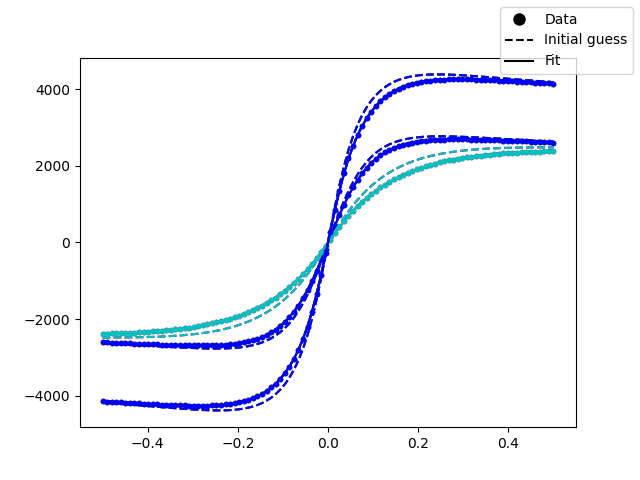

In [5]:
Fx_combined_folder = r'samples\fit\Fx_combined'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_Fx,initial_guess,Fz_nom,Fz_data_output,Fx_data_output,kappa_data,alpha_data,gamma_data,Fx_initial_output,Fx_fit_output = mfpy.Fit.Fx_combined(Fx_combined_folder,p_fit_Fx0,Fz_nom=None,full_output=2) #The Mz_folder needs the p_fit_Fy_pure

#Plot settings
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fz_data)):
    color = colors[i % len(colors)] 
    ax.plot(kappa_data[i],Fx_initial_output[i],'--',color=color)
    ax.plot(kappa_data[i],Fx_data_output[i],':',marker=".",color=color)
    ax.plot(kappa_data[i],Fx_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')
print(p_fit_Fx)

#### Fy combined

[ 7.70596465e+00  7.52423121e+00  2.15615542e-03 -9.82242611e-01
  1.20874991e+00  3.58365874e-01  1.43295143e-02  1.63029260e-02
  5.49931189e-03  4.89070577e-02  9.80051495e-03  2.14926766e-03
  9.22339973e+01  2.88623760e+00  1.03386074e+01]


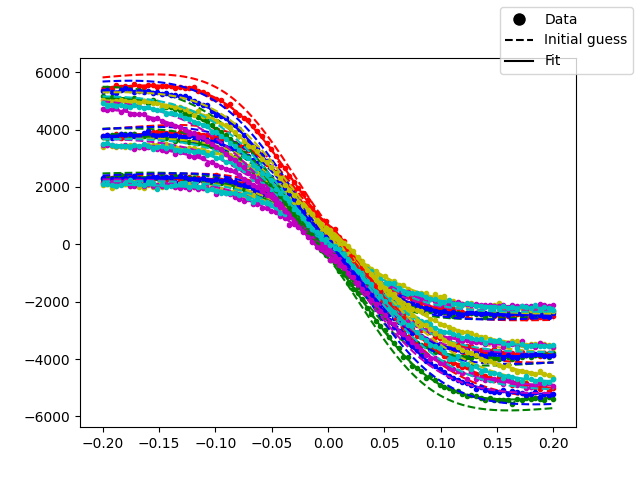

In [6]:
Fy_combined_folder = r'samples\fit\Fy_combined'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_Fy,initial_guess,Fz_nom,Fz_data_output,Fy_data_output,kappa_data,alpha_data,gamma_data,Fy_initial_output,Fy_fit_output = mfpy.Fit.Fy_combined(Fy_combined_folder,p_fit_Fy0,Fz_nom=None,full_output=2) #The Mz_folder needs the p_fit_Fy_pure
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fy_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Fy_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],Fy_data_output[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Fy_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')   
print(p_fit_Fy)

#### Mz combined

[ 8.74601694e-03  3.94307494e-02  8.44850663e-05 -3.00862720e-03]


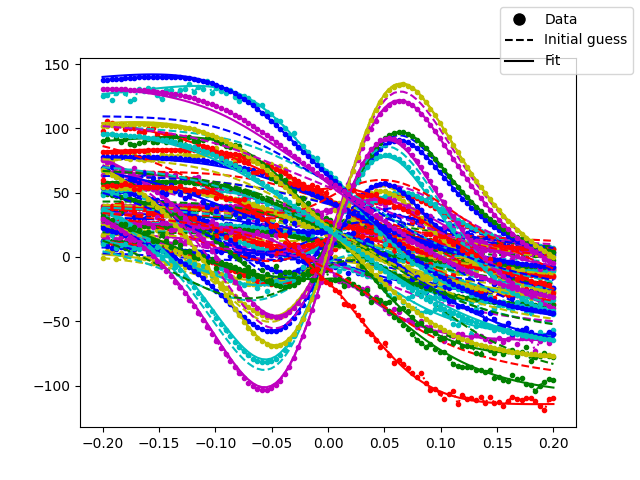

In [7]:
Mz_combined_folder = r'samples\fit\Mz_combined'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_Mz,initial_guess,Fz_nom,Fz_data_output,Mz_data_output,alpha_data,gamma_data,Mz_initial_output,Mz_fit_output = mfpy.Fit.Mz_combined(Mz_combined_folder,R0,Vx,p_fit_Fy0,p_fit_Fx0,p_fit_Mz0,p_fit_Fy,p_fit_Fx,Fz_nom=None,full_output=2) #The Mz_folder needs the p_fit_Fy_pure
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Mz_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Mz_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],Mz_data_output[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Mz_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right') 
print(p_fit_Mz)